Bias variance trade off

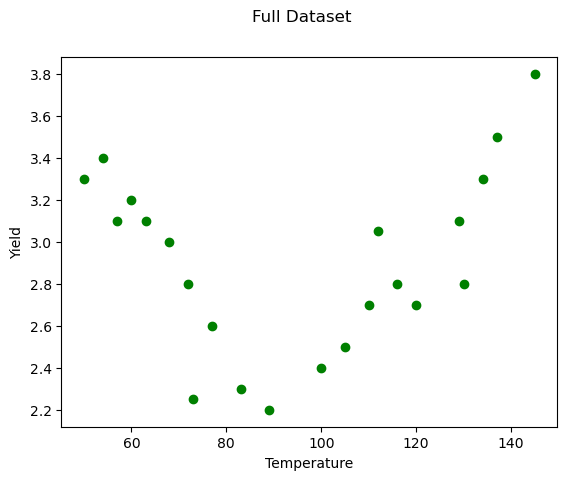

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

yld = pd.read_csv('yield2.csv', sep='\s+', index_col=0)

y = yld['Yield']
X = yld[['Temp']]

fig, ax = plt.subplots()
ax.scatter(X, y, color='green')
ax.set_xlabel('Temperature')
ax.set_ylabel('Yield')
fig.suptitle('Full Dataset');

splitting the dataset in a training set,containing 70% of the observations , test_set containing 30% of the observations

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y) 


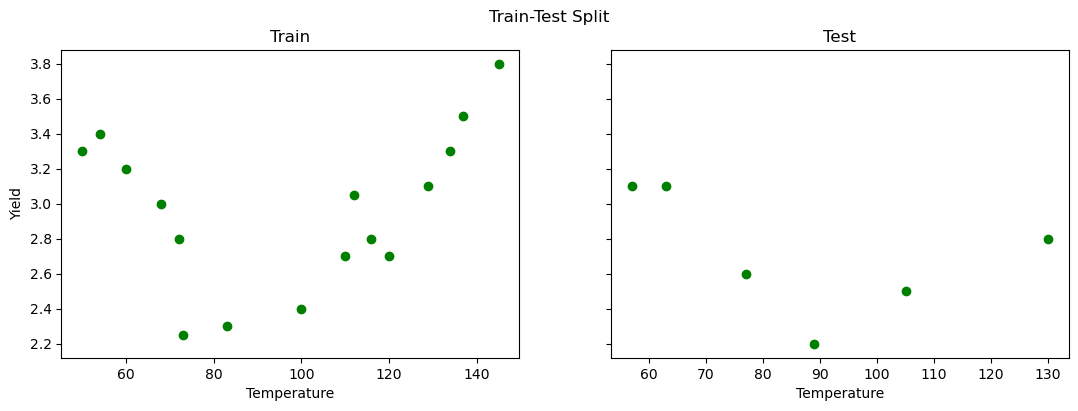

In [16]:
fig, axes = plt.subplots(ncols=2, figsize=(13,4), sharey=True)

axes[0].scatter(X_train, y_train, color='green')
axes[0].set_xlabel('Temperature')
axes[0].set_ylabel('Yield')
axes[0].set_title('Train')

axes[1].scatter(X_test, y_test, color='green')
axes[1].set_xlabel('Temperature')
axes[1].set_title('Test')

fig.suptitle('Train-Test Split');

In [17]:
reg = LinearRegression().fit(X_train,y_train)

In [18]:
# 6th degree polynomial
poly = PolynomialFeatures(6)
reg_poly = LinearRegression().fit(poly.fit_transform(X_train), y_train)

c:\Users\pc\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\pc\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


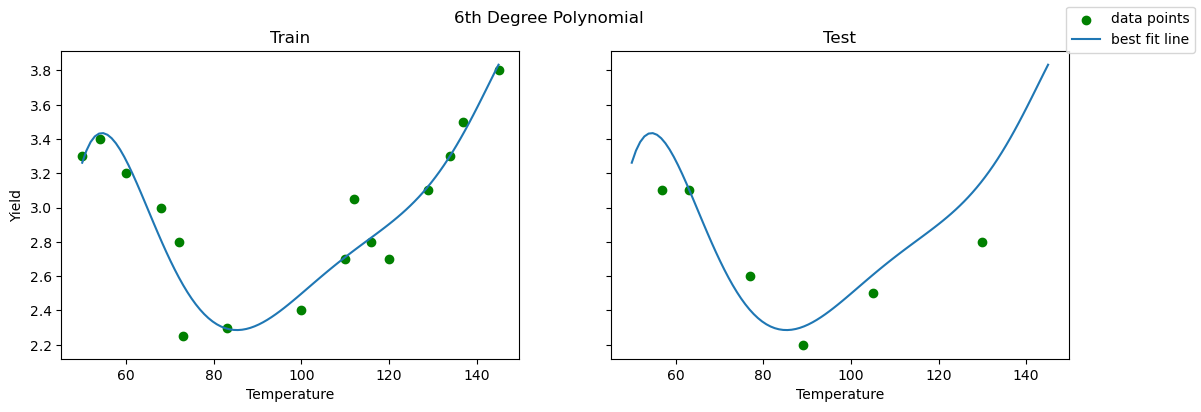

In [19]:
X_linspace = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
fig, axes = plt.subplots(ncols=2, figsize=(13,4), sharey=True)

axes[0].scatter(X_train, y_train, color='green', label="data points")
axes[0].plot(X_linspace, reg_poly.predict(poly.transform(X_linspace)), label="best fit line")
axes[0].set_xlabel('Temperature')
axes[0].set_ylabel('Yield')
axes[0].set_title('Train')

axes[1].scatter(X_test, y_test, color='green')
axes[1].plot(X_linspace, reg_poly.predict(poly.transform(X_linspace)))
axes[1].set_xlabel('Temperature')
axes[1].set_title('Test')

fig.legend()
fig.suptitle('6th Degree Polynomial');

In [23]:
print(f"""Train MSE: {mean_squared_error(y_train, reg_poly.predict(poly.transform(X_train)))}
Test MSE:  {mean_squared_error(y_test, reg_poly.predict(poly.transform(X_test)))}
""")

Train MSE: 0.020279343101123778
Test MSE:  0.0462702120486467



In [24]:
# 2nd degree polynomial
poly_2 = PolynomialFeatures(2)  
reg_poly_2 = LinearRegression().fit(poly_2.fit_transform(X_train), y_train)

c:\Users\pc\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\pc\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


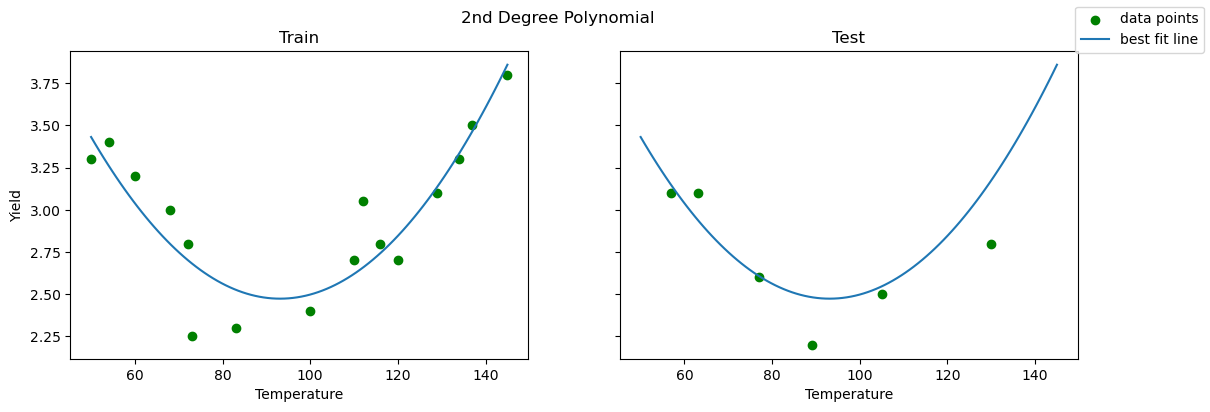

In [25]:
fig, axes = plt.subplots(ncols=2, figsize=(13,4), sharey=True)

axes[0].scatter(X_train, y_train, color='green', label="data points")
axes[0].plot(X_linspace, reg_poly_2.predict(poly_2.transform(X_linspace)), label="best fit line")
axes[0].set_xlabel('Temperature')
axes[0].set_ylabel('Yield')
axes[0].set_title('Train')

axes[1].scatter(X_test, y_test, color='green')
axes[1].plot(X_linspace, reg_poly_2.predict(poly_2.transform(X_linspace)))
axes[1].set_xlabel('Temperature')
axes[1].set_title('Test')

fig.legend()
fig.suptitle('2nd Degree Polynomial');

In [26]:
print(f"""6th Degree Polynomial
Train MSE: {mean_squared_error(y_train, reg_poly.predict(poly.transform(X_train)))}
Test MSE:  {mean_squared_error(y_test, reg_poly.predict(poly.transform(X_test)))}

2nd Degree Polynomial
Train MSE: {mean_squared_error(y_train, reg_poly_2.predict(poly_2.transform(X_train)))}
Test MSE:  {mean_squared_error(y_test, reg_poly_2.predict(poly_2.transform(X_test)))}
""")

6th Degree Polynomial
Train MSE: 0.020279343101123778
Test MSE:  0.0462702120486467

2nd Degree Polynomial
Train MSE: 0.03451507044461159
Test MSE:  0.04147861226211962

